# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<scmdata.ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  At

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics on groups of timeseries. A number of pandas functions can be called including "sum", "mean" and "describe".

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : str or func
            The operation to perform.

            If a string is provided, the equivalent pandas groupby function is used. Note
            that not all groupby functions are available as some do not make sense for
            this particular application. Additional information about the arguments for
            the pandas groupby functions can be found at <https://pandas.pydata.org/pan
            das-docs/stable/reference/groupby.html>`_.

            If a function is provided, it will be applied to each group. The function must
            take a dataframe as its first argument and return a DataFrame, Series or scalar.

            Note that quantile means the value of the data at a given point in the cumulative
        

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        K     Surface Temperature                    0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.453385   
                        W/m^2 Radiative Forcing                 0.521944   
                        K     Surface Temperature               0.477295   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.869429   
                        W/m^2 Radiative Forcing                 0.966187   
                        K     Surface Temperature               1.598495   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    1.707174   
                        W/m^2 Radiative Forcing                 1.296083   
                        K     Surface Temperature               1.653439   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    1.631400   
                        W/m^2 Radiative Forcing                 2.396506   
                        K     Surface Temperature               1.687979   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    2.832639   
                        W/m^2 Radiative Forcing                 2.666291   
                        K     Surface Temperature               2.206808   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    1.806367   
                        W/m^2 Radiative Forcing                 3.985402   
                        K     Surface Temperature               3.809238   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    2.871275   
                        W/m^2 Radiative Forcing                 3.965333   
                        K     Surface Temperature               4.213269   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    3.582943   
                        W/m^2 Radiative Forcing                 2.957786   
                        K     Surface Temperature               3.550408   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   ppm   Atmospheric Concentrations|CO2    3.965669  ...   
                        W/m^2 Radiative Forcing                 5.661979  ...   
                        K     Surface Temperature               5.670429  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        K     Surface Temperature                    0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.401356   
                        W/m^2 Radiative Forcing                 0.513622   
                        K     Surface Temperature               0.582735   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.571971   
                        W/m^2 Radiative Forcing                 0.896617   
                        K     Surface Temperature               1.728697   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    1.861623   
                        W/m^2 Radiative Forcing                 1.264251   
                        K     Surface Temperature               1.735489   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    1.780111   
                        W/m^2 Radiative Forcing                 2.711583   
                        K     Surface Temperature               1.024306   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    3.664447   
                        W/m^2 Radiative Forcing                 2.808740   
                        K     Surface Temperature               1.852287   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.743498   
                        W/m^2 Radiative Forcing                 3.894729   
                        K     Surface Temperature               3.543695   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    2.377590   
                        W/m^2 Radiative Forcing                 4.251920   
                        K     Surface Temperature               3.967032   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    3.202077   
                        W/m^2 Radiative Forcing                 2.601472   
                        K     Surface Temperature               3.983291   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   ppm   Atmospheric Concentrations|CO2    3.054726  ...   
                        W/m^2 Radiative Forcing                 6.333404  ...   
                        K     Surface Temperature               6.066838  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

### Arbitrary functions

You are also able to run arbitrary functions for each group

In [8]:
# NBVAL_IGNORE_OUTPUT
def mean_and_invert(df, axis=0):
    # Take a mean across the group and then invert the result
    return -df.mean(axis=axis)


runs.process_over("run_id", operation=mean_and_invert)

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2        -0.0   
                        W/m^2 Radiative Forcing                     -0.0   
                        K     Surface Temperature                   -0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -0.453385   
                        W/m^2 Radiative Forcing                -0.521944   
                        K     Surface Temperature              -0.477295   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -0.869429   
                        W/m^2 Radiative Forcing                -0.966187   
                        K     Surface Temperature              -1.598495   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -1.707174   
                        W/m^2 Radiative Forcing                -1.296083   
                        K     Surface Temperature              -1.653439   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -1.631400   
                        W/m^2 Radiative Forcing                -2.396506   
                        K     Surface Temperature              -1.687979   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -2.832639   
                        W/m^2 Radiative Forcing                -2.666291   
                        K     Surface Temperature              -2.206808   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -1.806367   
                        W/m^2 Radiative Forcing                -3.985402   
                        K     Surface Temperature              -3.809238   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -2.871275   
                        W/m^2 Radiative Forcing                -3.965333   
                        K     Surface Temperature              -4.213269   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -3.582943   
                        W/m^2 Radiative Forcing                -2.957786   
                        K     Surface Temperature              -3.550408   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   ppm   Atmospheric Concentrations|CO2   -3.965669  ...   
                        W/m^2 Radiative Forcing                -5.661979  ...   
                        K     Surface Temperature              -5.670429  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

In [9]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", operation=mean_and_invert, axis=1)

model    region  run_id  scenario  unit   variable                      
example  World   0       ssp119    ppm    Atmospheric Concentrations|CO2   -25.261867
                 1       ssp119    ppm    Atmospheric Concentrations|CO2   -25.265053
                 2       ssp119    ppm    Atmospheric Concentrations|CO2   -29.260344
                 3       ssp119    ppm    Atmospheric Concentrations|CO2   -26.674732
                 4       ssp119    ppm    Atmospheric Concentrations|CO2   -27.571309
                 5       ssp119    ppm    Atmospheric Concentrations|CO2   -22.730907
                 6       ssp119    ppm    Atmospheric Concentrations|CO2   -23.942270
                 7       ssp119    ppm    Atmospheric Concentrations|CO2   -23.883786
                 8       ssp119    ppm    Atmospheric Concentrations|CO2   -21.892153
                 9       ssp119    ppm    Atmospheric Concentrations|CO2   -28.470822
                 0       ssp119    W/m^2  Radiative Forcing        

### Other quantiles

In [10]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(
    cols="run_id", operation="quantile", q=0.17
)
lower_likely_quantile

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        K     Surface Temperature                    0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.066551   
                        W/m^2 Radiative Forcing                 0.234416   
                        K     Surface Temperature               0.125209   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.243994   
                        W/m^2 Radiative Forcing                 0.580586   
                        K     Surface Temperature               1.224132   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.929313   
                        W/m^2 Radiative Forcing                 0.406152   
                        K     Surface Temperature               0.757488   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.351849   
                        W/m^2 Radiative Forcing                 1.529462   
                        K     Surface Temperature               0.364032   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.920022   
                        W/m^2 Radiative Forcing                 0.725759   
                        K     Surface Temperature               0.824226   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.202539   
                        W/m^2 Radiative Forcing                 2.946603   
                        K     Surface Temperature               3.081182   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    1.350836   
                        W/m^2 Radiative Forcing                 1.512393   
                        K     Surface Temperature               2.988446   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   ppm   Atmospheric Concentrations|CO2    0.926424   
                        W/m^2 Radiative Forcing                 0.469385   
                        K     Surface Temperature               0.686298   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   ppm   Atmospheric Concentrations|CO2    1.466384  ...   
                        W/m^2 Radiative Forcing                 3.708306  ...   
                        K     Surface Temperature               3.085937  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [11]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :class:`pandas.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The op

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(
    cols="run_id", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"]
)
summary_stats

time                                                                   2000-01-01  \
model   region scenario unit  variable                       quantile               
example World  ssp119   ppm   Atmospheric Concentrations|CO2 0.05             0.0   
                        W/m^2 Radiative Forcing              0.05             0.0   
                        K     Surface Temperature            0.05             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.17             0.0   
                        W/m^2 Radiative Forcing              0.17             0.0   
                        K     Surface Temperature            0.17             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.5              0.0   
                        W/m^2 Radiative Forcing              0.5              0.0   
                        K     Surface Temperature            0.5              0.0   
                        ppm   Atmospheric Concentrations|CO2 0.83             0.0   
                        W/m^2 Radiative Forcing              0.83             0.0   
                        K     Surface Temperature            0.83             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.95             0.0   
                        W/m^2 Radiative Forcing              0.95             0.0   
                        K     Surface Temperature            0.95             0.0   
                        ppm   Atmospheric Concentrations|CO2 mean             0.0   
                        W/m^2 Radiative Forcing              mean             0.0   
                        K     Surface Temperature            mean             0.0   
                        ppm   Atmospheric Concentrations|CO2 median           0.0   
                        W/m^2 Radiative Forcing              median           0.0   
                        K     Surface Temperature            median           0.0   

time                                                                   2001-01-01  \
model   region scenario unit  variable                       quantile               
example World  ssp119   ppm   Atmospheric Concentrations|CO2 0.05        0.025838   
                        W/m^2 Radiative Forcing              0.05        0.160874   
                        K     Surface Temperature            0.05        0.042088   
                        ppm   Atmospheric Concentrations|CO2 0.17        0.066551   
                        W/m^2 Radiative Forcing              0.17        0.234416   
                        K     Surface Temperature            0.17        0.125209   
                        ppm   Atmospheric Concentrations|CO2 0.5         0.401356   
                        W/m^2 Radiative Forcing              0.5         0.513622   
                        K     Surface Temperature            0.5         0.582735   
                        ppm   Atmospheric Concentrations|CO2 0.83        0.924222   
                        W/m^2 Radiative Forcing              0.83        0.815813   
                        K     Surface Temperature            0.83        0.737959   
                        ppm   Atmospheric Concentrations|CO2 0.95        0.949174   
                        W/m^2 Radiative Forcing              0.95        0.874132   
                        K     Surface Temperature            0.95        0.807319   
                        ppm   Atmospheric Concentrations|CO2 mean        0.453385   
                        W/m^2 Radiative Forcing              mean        0.521944   
                        K     Surface Temperature            mean        0.477295   
                        ppm   Atmospheric Concentrations|CO2 median      0.401356   
                        W/m^2 Radiative Forcing              median      0.513622   
                        K     Surface Temperature            median      0.582735   

time                                                                   2002-01-01  \
mod

### Plotting

#### Calculate quantiles within plotting function

We can use `plumeplot` directly to plot quantiles. This will calculate the quantiles as part of making the plot so if you're doing this lots it might be faster to pre-calculate the quantiles, then make the plot instead (see below)

Note that in this case the default setttings in `plumeplot` don't produce anything that helpful, we show how to modify them in the cell below.

/Users/znicholls/Documents/AGCEC/MCastle/scmdata/src/scmdata/run.py:164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x1316521d0>])

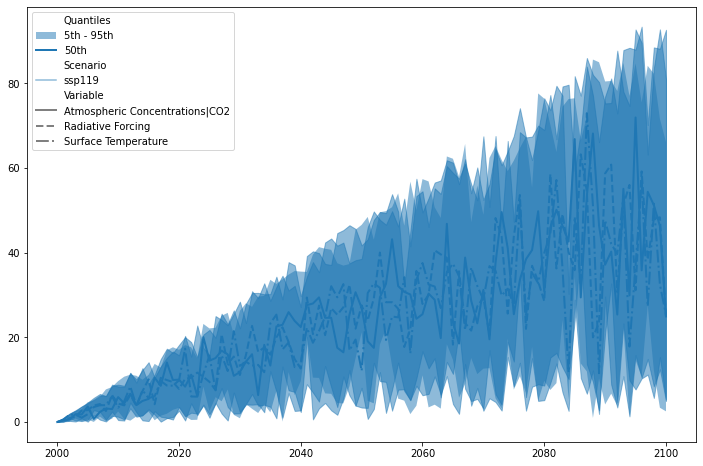

In [13]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(quantile_over="run_id")

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x1319863d0>])

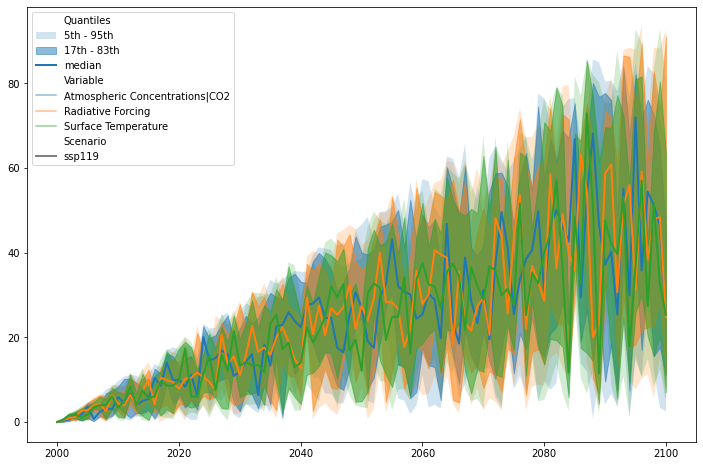

In [14]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(
    quantile_over="run_id",
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
)

#### Pre-calculated quantiles

Alternately, we can cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [15]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<scmdata.ScmRun (timeseries: 21, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119      K             Surface Temperature
	3   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119      K             Surface Temperature
	6   example      0.5  World   ssp119    ppm  Atmospheric Concentrations|CO2
	7   example      0.5  World   ssp119  W/m^2               Radiative Forcing
	8   example      0.5  World   ssp119      K             Surface Temperature
	9   example     0.83  World   ssp119    ppm  Atmospheric Concentrations|CO2
	10  example     0.83  World   ssp11

As discussed above, casting the output of `quantiles_over` to an `ScmRun` object helps avoid repeatedly calculating the quantiles.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x131bbd9d0>])

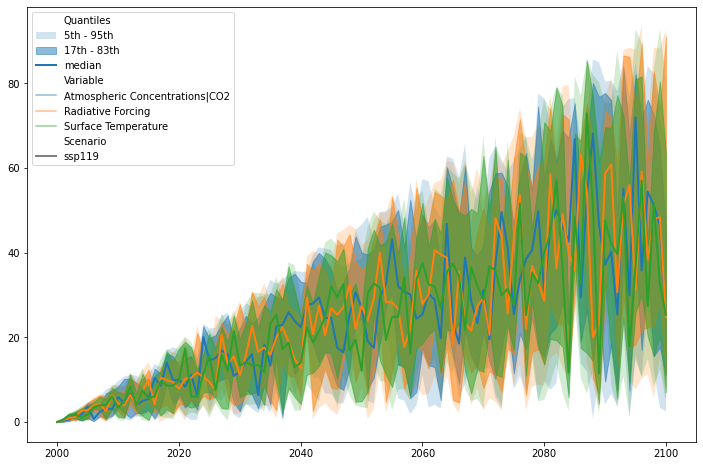

In [16]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    pre_calculated=True,
)

If we don't want a plume plot, we can always our standard lineplot method.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

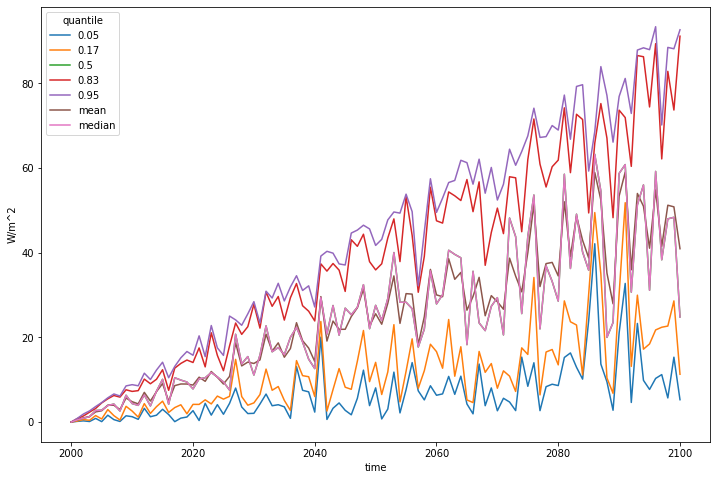

In [17]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(
    hue="quantile"
)